In [53]:
# LSTM 이용 로이스터 뉴스 카테고리 분류

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Conv1D, MaxPooling1D, Dropout
from keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from keras.datasets import reuters, imdb
from keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# 데이터 가져오기
(x_train, y_train),(x_test, y_test) = reuters.load_data(num_words = 1000, test_split = 0.2)
# num_words 빈도수가 큰 것을 기준으로 구분된 1000개

In [40]:
# 데이터 확인

np.max(y_train)

45

In [41]:
sorted(y_train)[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [42]:
category = np.max(y_train) + 1
print(category, '종류(카테고리)')
print(len(x_train), '학습용 뉴스 기사')
print(len(x_test), '테스트용 뉴스 기사')

46 종류(카테고리)
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사


In [43]:
print(x_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [44]:
# 단어의 수 맞추어 보기
x_train = sequence.pad_sequences(x_train, maxlen = 100)
x_train

array([[  0,   0,   0, ...,  15,  17,  12],
       [  0,   0,   0, ..., 505,  17,  12],
       [ 19, 758,  15, ...,  11,  17,  12],
       ...,
       [  0,   0,   0, ..., 407,  17,  12],
       [ 88,   2,  72, ..., 364,  17,  12],
       [125,   2,  21, ..., 113,  17,  12]])

In [45]:
x_test = sequence.pad_sequences(x_test, maxlen = 100)
x_test

array([[  5,   2,   7, ..., 510,  17,  12],
       [652, 194,   2, ..., 760,  17,  12],
       [ 13,  10, 139, ...,   8,  17,  12],
       ...,
       [  0,   0,   0, ...,  11,  17,  12],
       [  0,   0,   0, ...,   8,  17,  12],
       [ 47, 758,  15, ...,   2,  17,  12]])

In [46]:
# 원-핫 인코딩 처리
y_train = to_categorical(y_train)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
y_test = to_categorical(y_test)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [48]:
# 모델 구조
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation = 'tanh')) # LSTM은 tanh를 많이씀
model.add(Dense(46, activation = 'softmax')) # 46개 카테고리 별 출력

# 모델 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 학습의 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 실행
history = model.fit(x_train, y_train, batch_size = 20, epochs = 200, validation_data=(x_test, y_test),
                    callbacks = [early_stopping_callback])

# 테스트 정확도 출력
print('\n test acc : %.4f'%(model.evaluate(x_test, y_test)[1]))

Epoch 1/200
450/450 [==============================] - 4s 6ms/step - loss: 2.1720 - accuracy: 0.4498 - val_loss: 1.8190 - val_accuracy: 0.5232
Epoch 2/200
450/450 [==============================] - 3s 6ms/step - loss: 1.7281 - accuracy: 0.5546 - val_loss: 1.6551 - val_accuracy: 0.5828
Epoch 3/200
450/450 [==============================] - 3s 6ms/step - loss: 1.5557 - accuracy: 0.6086 - val_loss: 1.4827 - val_accuracy: 0.6313
Epoch 4/200
450/450 [==============================] - 3s 6ms/step - loss: 1.3596 - accuracy: 0.6555 - val_loss: 1.3725 - val_accuracy: 0.6545
Epoch 5/200
450/450 [==============================] - 3s 6ms/step - loss: 1.2475 - accuracy: 0.6848 - val_loss: 1.3026 - val_accuracy: 0.6741
Epoch 6/200
450/450 [==============================] - 3s 6ms/step - loss: 1.1386 - accuracy: 0.7132 - val_loss: 1.2481 - val_accuracy: 0.6794
Epoch 7/200
450/450 [==============================] - 3s 6ms/step - loss: 1.0486 - accuracy: 0.7379 - val_loss: 1.2177 - val_accuracy: 0.6879

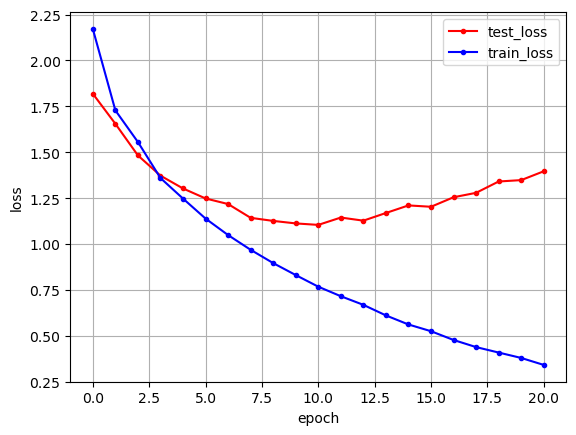

In [49]:
# 데이터 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c = 'red', label = 'test_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'train_loss')
plt.legend(loc = 'best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [50]:
# LSTM / CNN 조합 >> 영화 리뷰 분류하기

# 데이터 불러오기

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 5000)

17464789/17464789 [==============================] - 0s 0us/step


In [51]:
# 단어의 수를 맞추어 주기
x_train = sequence.pad_sequences(x_train, maxlen = 500)
x_test = sequence.pad_sequences(x_test, maxlen = 500)

In [52]:
x_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [54]:
# 모델 구조 설정

model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, kernel_size=5, padding='valid', activation = 'relu', strides=1))
model.add(MaxPooling1D(pool_size = 4))
model.add(LSTM(55))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_3 (LSTM)               (None, 55)                26400     
                                                                 
 dense_3 (Dense)             (None, 1)                 56        
                                                      

In [55]:
# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 조기 종료 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 실행
history = model.fit(x_train, y_train, batch_size=40, epochs=200, validation_split= 0.25, callbacks = [early_stopping_callback])


Epoch 1/200
469/469 [==============================] - 8s 9ms/step - loss: 0.4003 - accuracy: 0.8046 - val_loss: 0.3066 - val_accuracy: 0.8702
Epoch 2/200
469/469 [==============================] - 4s 9ms/step - loss: 0.2412 - accuracy: 0.9057 - val_loss: 0.2901 - val_accuracy: 0.8827
Epoch 3/200
469/469 [==============================] - 4s 9ms/step - loss: 0.1894 - accuracy: 0.9290 - val_loss: 0.2712 - val_accuracy: 0.8926
Epoch 4/200
469/469 [==============================] - 4s 9ms/step - loss: 0.1482 - accuracy: 0.9465 - val_loss: 0.2873 - val_accuracy: 0.8893
Epoch 5/200
469/469 [==============================] - 4s 9ms/step - loss: 0.1253 - accuracy: 0.9541 - val_loss: 0.3158 - val_accuracy: 0.8861
Epoch 6/200
469/469 [==============================] - 4s 9ms/step - loss: 0.0954 - accuracy: 0.9683 - val_loss: 0.3285 - val_accuracy: 0.8886
Epoch 7/200
469/469 [==============================] - 4s 9ms/step - loss: 0.0759 - accuracy: 0.9753 - val_loss: 0.3643 - val_accuracy: 0.8870

In [56]:
# 테스트 정확도 출력
print('Test ACC :', round(model.evaluate(x_test, y_test)[1],2))

782/782 [==============================] - 2s 3ms/step - loss: 0.5100 - accuracy: 0.8741
Test ACC : 0.87


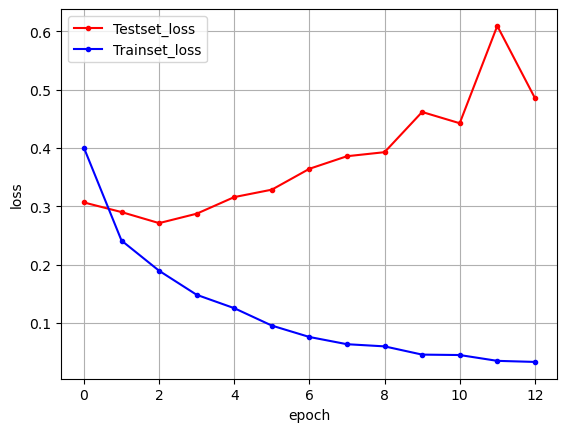

In [58]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')
plt.legend(loc = 'best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [60]:
!pip install attention

  Using cached attention-4.1-py3-none-any.whl (8.6 kB)


In [61]:
# 어텐션 (attention) 신경망
from attention import Attention

In [65]:
# 모델 구조 재설계

model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
# return_sequences = True >> 각 시퀀스에서 출력을 해달라는 의미
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 500)         2500000   
                                                                 
 dropout_3 (Dropout)         (None, None, 500)         0         
                                                                 
 lstm_5 (LSTM)               (None, None, 64)          144640    
                                                                 
 attention_1 (Attention)     (None, 128)               20480     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,665,249
Trainable params: 2,665,249
No

In [66]:
# 모델 실행 옵션 설정
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 조기 종료 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 실행
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=40,
                    callbacks=[early_stopping_callback])

# 테스트 정확도 출력
print('\nTest ACC :', round(model.evaluate(x_test, y_test)[1],4))

Epoch 1/200
625/625 [==============================] - 18s 28ms/step - loss: 0.3857 - accuracy: 0.8238 - val_loss: 0.3066 - val_accuracy: 0.8729
Epoch 2/200
625/625 [==============================] - 17s 27ms/step - loss: 0.2321 - accuracy: 0.9095 - val_loss: 0.2865 - val_accuracy: 0.8872
Epoch 3/200
625/625 [==============================] - 18s 28ms/step - loss: 0.1672 - accuracy: 0.9363 - val_loss: 0.2815 - val_accuracy: 0.8862
Epoch 4/200
625/625 [==============================] - 18s 28ms/step - loss: 0.1228 - accuracy: 0.9537 - val_loss: 0.3508 - val_accuracy: 0.8781
Epoch 5/200
625/625 [==============================] - 18s 28ms/step - loss: 0.0889 - accuracy: 0.9658 - val_loss: 0.3843 - val_accuracy: 0.8842
Epoch 6/200
625/625 [==============================] - 17s 28ms/step - loss: 0.0633 - accuracy: 0.9764 - val_loss: 0.4551 - val_accuracy: 0.8745
Epoch 7/200
625/625 [==============================] - 18s 28ms/step - loss: 0.0469 - accuracy: 0.9830 - val_loss: 0.4915 - val_ac

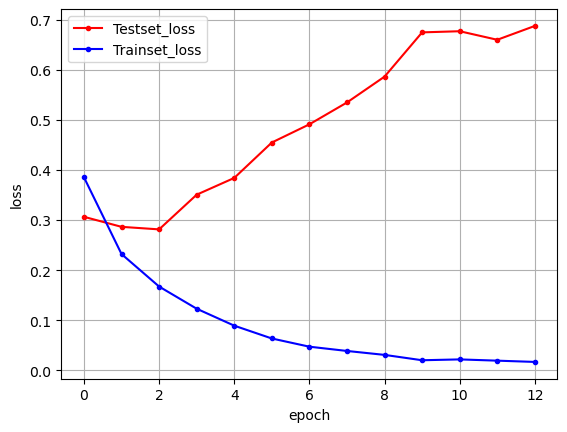

In [67]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')
plt.legend(loc = 'best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()